## Introduction

Natural Language processing, in this age of AI, has helped solve important problems and innovated new solutions like automated chat bots, article summarizers, multi-lingual translation and opinion identification from data. From a long time, all natural processing techniques have been applied mostly on the English language only, due to limit of knowledge of other languages. With the goal of solving machine transaltion problems, we need researchers to have sufficient information about the structure of other languages. Given that the vocabulary of different languages vary significantly and the massive data required for training of statistical models collected from different sources like news articles, journals, etc is tedious to process, I introduce this tutorial based on a software library for performing natural language processing tasks namely <b>spaCy</b>.

## spaCy ##
<b>spaCy</b> is a tool for performing a complete pipeline of language processing tasks seemlessly. The following are few of the tasks that can be carried out using spaCy:

<ul>
    <li>Part-of-speech tagging</li>
    <li>Dependency Parsing: annonating syntactic dependencies</li>
    <li>Entity Recognition: annonating names entities</li>
    <li>Text Categorization</li>
    <li>Tokenize text into words, punctuation marks, etc</li>
    <li>Lemmatization: assign base form to words</li>
    <li>Matcher: matches sequences of tokens based on either pattern rules or documents</li>
</ul>

## Architecture of spaCy ##

To get a more clear of the basic functioning of the spaCy library, let's look at its architecture.

 <a href="https://spacy.io/assets/img/architecture.svg">Source</a>

As shown in the diagram above, the 'Doc' and 'Vocab' are the central data structures in spaCy. 
Doc objects maintains a set of tokens and Vocab object maintains a set of look-up tables that make common information available across documents. For the purpose of <i>single source truth</i>, spaCy indexes words using hashes instead of integers, so that each word always has the same index independent of the Doc.
'Language' object coordinates these components of the model to perform end-to-end pipeline steps on the entire text resulting into an annotated document.

### spaCy installation instructions

The library can be installated using different environments as follows.

In [2]:
## Installing using pip
pip install -U spacy

## Installing using Conda ##
!conda install -c conda-forge spacy --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.4.8
  latest version: 4.5.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /Users/simralchaudhary/anaconda2/envs/pds

  added / updated specs: 
    - spacy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2018.1.18  |                0         141 KB  conda-forge
    termcolor-1.1.0            |           py36_1           6 KB  conda-forge
    msgpack-python-0.4.8       |           py36_0          83 KB  conda-forge
    ftfy-4.4.2                 |           py36_0          51 KB  conda-forge
    dill-0.2.7.1               |           py36_0          82 KB  conda-forge
    thinc-6.10.2               |           py36_0         1.4 MB  conda-forge
    msgpack-numpy-0.4.1        |             py_0           8 KB 

### Language ###

Language is an object in Spacy and is used to load your data to do further processing on it. A Language object contains the vocabulary of your data, the language data(data itself), loaded model data(if any Language model such as english, german has been initialised), and a processing pipline(components like tagger, parser, etc that are called in order on your document).
Let's begin with initialisation of the Language object.

In [68]:
import spacy
from spacy.pipeline import EntityRecognizer
from spacy.vocab import Vocab
from spacy.language import Language
from spacy.lang.en import English
nlp = English()
sentence = nlp('This is the text to be parsed. It is part of my tutorial on the software library Spacy. Spacy is claimed to be the world\'s best natural language processing toolkit.')

Object Nlp above is a type of default model load from spacy's language model class for English language. Using this object we would be able to perform nlp actions on the paragraph, access its linguistic annotations and properties.

We can also load a whole document in the model class like the following. I am using a document of small set of user reviews of Tripadvisor's website.

In [57]:
doc = open('review.txt', encoding='utf-8').read()
doc = nlp(doc)

In [58]:
print(doc[0:100])

author:everywhereman2
Old seattle getaway This was Old World Excellence at it's best.THIS is the place to stay at when visiting the historical area of Seattle. Your right on the water front near the ferry's and great sea food restraunts,and still with'in walking distance for great blues and jazz music. The staff for this hotel are excellent,they make you feel right at home. The breakfast was great.We did'nt have to travel far to have a good cup of JOE and a light meal to start


The loaded document has number of attributes associated with it, accessed using dir()

In [59]:
dir(doc)

['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '_py_tokens',
 '_realloc',
 '_vector',
 '_vector_norm',
 'cats',
 'char_span',
 'count_by',
 'doc',
 'ents',
 'extend_tensor',
 'from_array',
 'from_bytes',
 'from_disk',
 'get_extension',
 'get_lca_matrix',
 'has_extension',
 'has_vector',
 'is_parsed',
 'is_tagged',
 'mem',
 'merge',
 'noun_chunks',
 'noun_chunks_iterator',
 'print_tree',
 'sentiment',
 'sents',
 'set_extension',
 'similarity',
 'tensor',
 'text',
 'text_with_ws',
 'to_array',
 'to_bytes',
 'to_disk',
 'user_data',
 'user_hooks',
 'user_span_hooks',
 'user_token_hooks',
 'vector',
 've

## Tokenization ##

A document can be tokenized into sentences and tokens to perform meaningful operations on it. Tokenization is simple breaking the document into sentences and further into words to form an iterable.

Using the first Tripadvisor review for creating a new document as below:

In [73]:
nlp = spacy.load('en')

In [72]:
doc = nlp('Old seattle getaway this was Old World Excellence at the best. THIS is the place to stay at when visiting the historical area of Seattle. Your right on the water front near the ferry\'s and great sea food restraunts,and still within walking distance for great blues and jazz music. The staff for this hotel are excellent,they make you feel right at home.')
for span in doc.sents:
    sent = [doc[i] for i in range(span.start, span.end)]
    print(sent)
    break
for token in sent:
    print(token.orth_)

[Old, seattle, getaway, this, was, Old, World, Excellence, at, the, best, .]
Old
seattle
getaway
this
was
Old
World
Excellence
at
the
best
.


## POS Tagging ##

POS or Parts of Speech is a category of words that they're assigned to based on their similarity in grammatical properties. A POS tagger takes each token and assigns its corresponding category such as Noun, Adjective, Verb, Proper Noun, Punctuation, etc. These tags can be used as the text features in information filtering, statistical models, and rule based parsing.

Spacy's POS tagger annotates the parts-of-speech tags of the document in a single step.

In [113]:
doc = nlp('Old Seattle getaway this was old world excellence at the best. This is the place to stay at when visiting the historical area of Seattle. Your right on the water front near the ferry\'s and great sea food restraunts,and still within walking distance for great blues and jazz music. The staff for this hotel are excellent,they make you feel right at home.')
for span in doc.sents:
    sent = [doc[i] for i in range(span.start, span.end)]
    break
for token in sent:
    print(token.orth_, ':', token.pos_)

Old : PROPN
Seattle : PROPN
getaway : NOUN
this : DET
was : VERB
old : ADJ
world : NOUN
excellence : NOUN
at : ADP
the : DET
best : ADJ
. : PUNCT


Let's make use of the tokenization and pos-tagging functions to filter some words in our document. Here I create a small data cleaning function which removes common stop words, Punctuation and Determinant tag words, words with very short length, from the input document and returns the top 5 unigrams from the remaining words in the document.

In [116]:
noisy_pos_tags = ['PUNCT', 'DET']
min_token_length = 2

#Function to check if the token is a noise or not  
def isNoise(token):     
    is_noise = False
    if token.pos_ in noisy_pos_tags:
        is_noise = True 
    elif token.is_stop == True:
        is_noise = True
    elif len(token.string) <= min_token_length:
        is_noise = True
    return is_noise 

def cleanup(token, lower = True):
    if lower:
       token = token.lower()
    return token.strip()

from collections import Counter
cleaned_list = [cleanup(word.string) for word in doc if not isNoise(word)]
Counter(cleaned_list) .most_common(5)

[('old', 2), ('seattle', 2), ('right', 2), ('great', 2), ('getaway', 1)]

## Parsing ##

The above jobs of tokenizing, pos-tagging, lower case conversion, etc. can also be done in a short way by using the Parser given in-built by using Parser of Spacy. The output in the code snippet below shows the hash ID of the token/lower-case token/lemma as defined in the Vocab of model English class.

In [126]:
parser = English()
parsedData = parser('This text is part of my tutorial on the software library Spacy. Spacy is a natural language processing toolkit.')
for i, token in enumerate(parsedData):
    print("token:", token.orth, token.orth_)
    print("lowercased:", token.lower, token.lower_)
    print("lemma:", token.lemma, token.lemma_)
    print("------")
    if i > 1:
        break

token: 12943039165150086467 This
lowercased: 1995909169258310477 this
lemma: 12943039165150086467 This
------
token: 15099781594404091470 text
lowercased: 15099781594404091470 text
lemma: 15099781594404091470 text
------
token: 3411606890003347522 is
lowercased: 3411606890003347522 is
lemma: 10382539506755952630 be
------


##  Entity Detection ##

Spacy consists of a fast entity recognition model which is capable of identifying entitiy phrases from the document. Entities can be of different types, such as – person, location, organization, dates, numerals, etc. These entities can be accessed through “.ents” property.

Let’s find all the types of named entities from present in our document.

In [ ]:
labels = set([w.label_ for w in document.ents]) 
for label in labels: 
    entities = [cleanup(e.string, lower=False) for e in document.ents if label==e.label_] 
    entities = list(set(entities)) 
    print label,entities

## Dependency Parsing ##

Dependency Parsing is a core concept in natural language processing which involves constructing relationships between words in a sentence and evaluating their dependencies over each other. 
One of the most powerful feature of spacy is the extremely fast and accurate syntactic dependency parser. The parser can also be used for sentence boundary detection and phrase chunking. The relations can be accessed by the properties “.children” , “.root”, “.ancestor” etc. to navigate the tree.

In [136]:
doc = nlp('This hotel has beautiful interiors. Every wall is decorated with an antique piece of art. The entrance to the hotel lobby is like a grande castle, hence giving a classy feeling.')

# extract the sentence that contains the term - hotel
hotel = [sent for sent in doc.sents if 'hotel' in sent.string.lower()]

# create dependency tree
sentence = hotel[1] 
for word in sentence:
    print (word, ': ', str(list(word.children)))

The :  []
entrance :  [The, to]
to :  [lobby]
the :  []
hotel :  []
lobby :  [the, hotel]
is :  [entrance, like, ,, giving, .]
like :  [castle]
a :  []
grande :  []
castle :  [a, grande]
, :  []
hence :  []
giving :  [hence, feeling]
a :  []
classy :  []
feeling :  [a, classy]
. :  []


## Visualizer : displaCy ##

The above dependencies of each token would be hard to comprehend if it was a long document! To visualize this in the form of a tree, Spacy comes with a built-in visualisation suite called displaCy. 

In [144]:
from spacy import displacy
parser = spacy.load('en')
example = "The waitor served the guests very elegantly"
parsedEx = parser(example)

displacy.serve(parsedEx, style='dep', options={'compact':True})


    Serving on port 5000...
    Using the 'dep' visualizer



127.0.0.1 - - [31/Mar/2018 22:57:12] "GET / HTTP/1.1" 200 5314



    Shutting down server on port 5000.



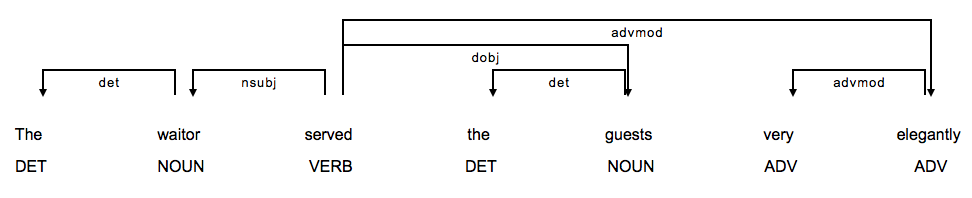

The command displacy.serve builds a dependency parse tree or a named entity visualisation which is rendered on a small web server on localhost at port 5000. If you open a new window in your browser with address 'localhost:5000/', the rendered graph would be visible there. You would need to stop the execution of the above command to close the server.

## Named Entity Recognition ##

Named-entity recognition (NER) is a part of information extraction that seeks to locate and classify named entities in text into pre-defined categories such as the names of persons, organizations, locations, expressions of times, quantities, monetary values, percentages, etc.

Spacy's entity recognizer does the same job of annotating the entities in the given document. The EntityRecogniser can be trained as per our own model by customising the pipeline. For simplification, I demonstrate the extraction of these named entities with the help of parser's attributes.

In [163]:
example = "The waitress named Susan served the guests from 8.00 PM to 10.00 PM at the Plaza Hotel"
parser = spacy.load('en')
parsedEx = parser(example)
for token in parsedEx:
    print(token.orth_, token.ent_type_ if token.ent_type_ != "" else "(not an entity)")

print("------Grouped Entities-------")
# Only extracting the interdependent entities
ents = list(parsedEx.ents)
for entity in ents:
    print(entity.label, entity.label_, ' '.join(t.orth_ for t in entity))

The (not an entity)
waitress (not an entity)
named (not an entity)
Susan PERSON
served (not an entity)
the (not an entity)
guests (not an entity)
from (not an entity)
8.00 TIME
PM TIME
to TIME
10.00 TIME
PM TIME
at (not an entity)
the FAC
Plaza FAC
Hotel FAC
------Grouped Entities-------
378 PERSON Susan
389 TIME 8.00 PM to 10.00 PM
9191306739292312949 FAC the Plaza Hotel


In [165]:
displacy.serve(parsedEx, style='ent', options={'compact':True})


    Serving on port 5000...
    Using the 'ent' visualizer



127.0.0.1 - - [31/Mar/2018 23:16:05] "GET / HTTP/1.1" 200 1644



    Shutting down server on port 5000.



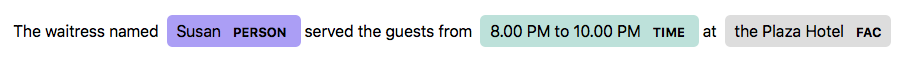

Above is the snapshot of the visualisation of the entity structure done using displacy.serve. For building entity structure, we need to pass 'style' attribute as 'ent' to displacy.serve

## Word to Vectors Integration ##

Spacy also provides inbuilt integration of dense, real valued vectors representing distributional similarity information. It uses GloVe vectors to generate vectors. GloVe is an unsupervised learning algorithm for obtaining vector representations for words.

Let's see how similar common words like cities are to each other.

In [174]:
doc = nlp(u"Italy and Venice are similar. Data Science and food aren't.")
italy = doc[0]
venice = doc[2]
science = doc[6:8]
food = doc[9]

print(italy.similarity(venice))
print(science.similarity(food))

0.0033605702
0.0


## SpaCy Pipeline and Properties

A Spacy Pipeline is a sequence of functions to be executed one by one. Pipeline gives us the liberty to customise any machine learning model to use specific spacy or user-defined functions like tokenization, lemmatization, etc. or possibly use models for other Languages with similar language structure. A pipeline typically would contain information about Language (vocabulary, named entities, any trained embeddings, etc).

#### Spacy Model ####
There are many inbuilt models present in Spacy for different languages. Each of these models is used for different purposes such as vectorization or tagging.
I will be using the model named english-core-web for our further explanation. 'english-core-web' is a multi-task statistical model for english language which assigns word vectors, context-specific token vectors, POS tags, dependency parse and named entities.

## Thinc : Machine Learning and Deep Learning with text ##

Thinc is the machine learning library powering spaCy. Thinc is a practical toolkit for implementing models that follow the "Embed, encode, attend, predict" architecture. It's designed to be easy to install, efficient for CPU usage and optimised for NLP and deep learning with text – in particular, hierarchically structured input and variable-length sequences. The major difference between Thinc and other ML frameworks like Tensorflow is that it doesn't build computational graphs to store the state of layers. Instead, it uses a stack to store the states from the forward pass into callbacks of the layers. 

However, Thinc is still under developement and is not entirely stable. Hence, to demonstrate the construction of using a machine learning model of third-party library, I will use sklearn's basic LinearSVC to learn and predict the structure of input text.

### Sentiment Analysis using Spacy ###
Integrating custome machine learning models in Spacy is pretty easy and straightforward. Let’s build a very basic sentiment analyser for using sklearn. I will create a sklearn pipeline with following components: cleaner, tokenizer, vectorizer, classifier. For tokenizer and vectorizer I will use a custom module using spacy build in
<a href="https://nicschrading.com/project/Intro-to-NLP-with-spaCy/">[1]</a>.

In [180]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.metrics import accuracy_score 
from sklearn.base import TransformerMixin 
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

import string
punctuations = string.punctuation

parser = English()

#Custom transformer using spaCy 
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
    def get_params(self, deep=True):
        return {}

# Basic utility function to clean the text 
def clean_text(text):     
    return text.strip().lower()

Let’s now create a custom tokenizer function using spacy parser and some basic cleaning. One thing to note here is that, the text features can be replaced with word vectors (especially beneficial in deep learning models)

In [177]:
#Create spacy tokenizer that parses a sentence and generates tokens 
def spacy_tokenizer(sentence):
    tokens = parser(sentence)
    tokens = [tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_ for tok in tokens]
    tokens = [tok for tok in tokens if (tok not in stopwords and tok not in punctuations)]
    return tokens

#Create vectorizer object to generate feature vectors, using custom spacy’s tokenizer
vectorizer = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))
classifier = LinearSVC()

We are now ready to create the pipeline, load the data sample given below, and run the classifier model.

In [178]:
# Create the  pipeline to clean, tokenize, vectorize, and classify 
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', vectorizer),
                 ('classifier', classifier)])

# Load sample data
train = [('I love this sandwich.', 'pos'),          
         ('this is an amazing place!', 'pos'),
         ('I feel very good about these beers.', 'pos'),
         ('this is my best work.', 'pos'),
         ("what an awesome view", 'pos'),
         ('I do not like this restaurant', 'neg'),
         ('I am tired of this stuff.', 'neg'),
         ("I can't deal with this", 'neg'),
         ('he is my sworn enemy!', 'neg'),          
         ('my boss is horrible.', 'neg')] 
test =   [('the beer was good.', 'pos'),     
         ('I do not enjoy my job', 'neg'),
         ("I ain't feelin dandy today.", 'neg'),
         ("I feel amazing!", 'pos'),
         ('Gary is a good friend of mine.', 'pos'),
         ("Not bad!", 'pos'),
         ("I'm not hurt!", 'pos')]
# Create model and measure accuracy
pipe.fit([x[0] for x in train], [x[1] for x in train]) 
pred_data = pipe.predict([x[0] for x in test]) 
for (sample, pred) in zip(test, pred_data):
    print (sample, pred )
print("Accuracy:", accuracy_score([x[1] for x in test], pred_data))

('the beer was good.', 'pos') pos
('I do not enjoy my job', 'neg') neg
("I ain't feelin dandy today.", 'neg') neg
('I feel amazing!', 'pos') pos
('Gary is a good friend of mine.', 'pos') pos
('Not bad!', 'pos') neg
("I'm not hurt!", 'pos') neg
Accuracy: 0.7142857142857143


As can be seen above, the test sentences have been classified into positive or negative sentiment values. This is a very basic model and hence gives incorrect results for sentence structure of the negation form. However, more complex models from sklearn and other libraries can be easily used to build a concrete sentiment analyser.

## Comparison with other libraries ##

Spacy is very powerful and industrial strength package for almost all natural language processing tasks. It is a a more simplified version of older libraries like CoreNLP and NLTK. Here is a thorough comparison of Spacy with CoreNLP and NLTK in terms of features, speed and accuracy.

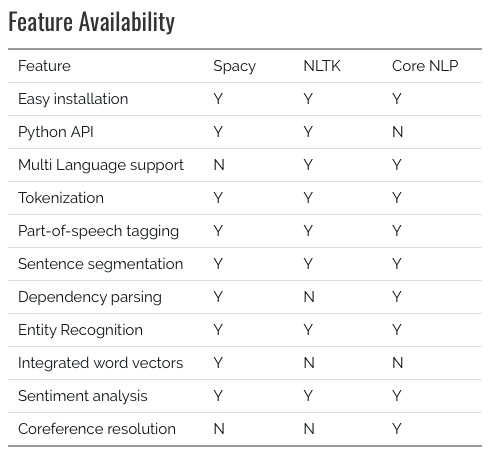



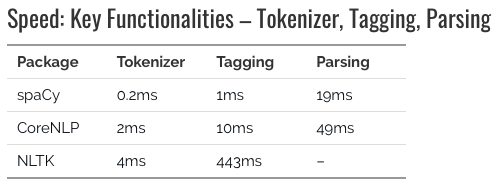

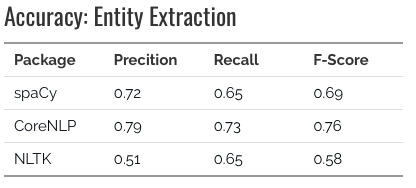

<a href="https://www.analyticsvidhya.com/blog/2017/04/natural-language-processing-made-easy-using-spacy-%E2%80%8Bin-python/">Source</a>

## End Notes ##

In this article we discussed about Spacy – a complete package to implement NLP tasks in python. We went through various examples showcasing the usefulness of spacy, its speed and accuracy. Finally we compared the package with other famous nlp libraries – corenlp and nltk.

Once the concepts described in this article are understood, one can implement challenging problems exploiting text data and natural language processing.

## Further resources ##

For list of parts of speech attributes: https://spacy.io/api/annotation

For getting basic insight into using spacy alongwith Keras: https://explosion.ai/blog/spacy-deep-learning-keras

## References ##

https://github.com/explosion/thinc,

https://spacy.io,

https://spacy.io/usage/spacy-101#lightning-tour,

https://github.com/explosion/spaCy/tree/master/examples,

https://explosion.ai/blog/spacy-deep-learning-keras,

https://spacy.io/usage/training,

https://nicschrading.com/project/Intro-to-NLP-with-spaCy/,

https://www.analyticsvidhya.com/blog/2017/04/natural-language-processing-made-easy-using-spacy-%E2%80%8Bin-python/